# Описание проекта

Мы — маркетинговый аналитик развлекательного приложения. Наша задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.


Нам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.



### Инструкция по выполнению проекта:


#### Шаг 1. Загрузим данные и подготовьте их к анализу

 
#### Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии



#### Шаг 3. Проведём исследовательский анализ данных



#### Шаг 4. Маркетинг


#### Шаг 5. Оцениv окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. 

#### Шаг 6. Напишите выводы
- Выделим причины неэффективности привлечения пользователей;
- Сформируем рекомендации для отдела маркетинга для повышения эффективности.


## Шаг 1. Загрузим данные и подготовьте их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. 


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # лог сервера с информацией о посещениях сайта
    pd.read_csv('/datasets/orders_info_short.csv'),  # информация о заказах
    pd.read_csv('/datasets/costs_info_short.csv'),  # информация о затратах на маркетинг
     
)

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
#Привел названия столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [7]:
visits = visits.rename(columns ={'user id':'user_id', 'session start':'session_start','session end':'session_end' })
orders = orders.rename(columns ={'user id':'user_id','event dt':'event_dt' })
#переименовал столбцы

In [8]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [9]:
#Пропусков не обнаружено
#visits.isna().sum()
#orders.isna().sum()
#costs.isna().sum()

In [10]:
#visits.info()

In [11]:
#orders.info()

In [12]:
#costs.info()

In [13]:
visits.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

In [15]:
costs.duplicated().sum()

0

явных дубликатов не обнаружено.

### 1.1 Вывод
Нам представили 3 датафрейма:
- лог сервера с информацией о посещениях сайта
- информация о заказах
- информация о затратах на маркетинг

Преобразовали типы данных, переименовали столбцы, привели к нижнему регистру. Пропусков не обнаружено, двигаемся дальше. 

## Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии


In [16]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [18]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [20]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [22]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### 2.1 Вывод

Определили функции get_profiles(), get_retention(), get_conversion(), get_ltv(), а также plot_retention(), plot_conversion() и plot_ltv_roi(), с которыми мы познакомились в теоретических уроках.


## Шаг 3. Проведите исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [24]:
events = None
profiles = get_profiles(visits, orders, events, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [25]:
#минимальная дата привлечения
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [26]:
#максимальная дата привлечения
profiles['dt'].max()

datetime.date(2019, 10, 27)

In [27]:
profiles.groupby('region').agg({'payer': 'mean'}).sort_values('payer', ascending = False )

,payer
region,
United States,0.069019
Germany,0.041119
UK,0.039829
France,0.037994


In [28]:
#profiles.groupby('region').agg({'payer': 'sum'}).sort_values('payer', ascending = False )

Больше всего платящих пользователей дают United States и Germany

In [29]:
profiles.groupby('device').agg({'payer': 'mean'}).sort_values('payer', ascending = False )

,payer
device,
Mac,0.063644
iPhone,0.062079
Android,0.058518
PC,0.050468


In [30]:
#profiles.groupby('device').agg({'payer': 'sum'}).sort_values('payer', ascending = False )

Платящие пользователи пользуются устройствами такими как: Mac, iPhone, Android, PC. 

Больше всего платящих пользователей приходит с утройств Mac и iPhone

In [31]:
profiles.groupby('channel').agg({'payer': 'mean'}).sort_values('payer', ascending = False )

,payer
channel,
FaceBoom,0.122049
AdNonSense,0.113402
lambdaMediaAds,0.104700
TipTop,0.096007
RocketSuperAds,0.079137
WahooNetBanner,0.052964
YRabbit,0.038265
MediaTornado,0.035747
LeapBob,0.030633


In [32]:
#profiles.groupby('channel').agg({'payer': 'sum'}).sort_values('payer', ascending = False )

Больше всего приносят платящих пользователей каналы FaceBoom, AdNonSense, lambdaMediaAds

### 3.1 Вывод
Создали пользовательские профили.

- Построили таблицу, отражающую количество пользователей и долю платящих из каждой страны и пришли к выводу, что больше всего платящих пользователей дают United States и Germany.

- Построили таблицу, отражающую количество пользователей и долю платящих для каждого устройства и пришли к выводу, что больше всего платящих пользователей приходит с утройств Mac и iPhone

- Построили таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения и пришли к выводу, что больше всего приносят платящих пользователей каналы FaceBoom, AdNonSense, lambdaMediaAds

# Шаг 4. Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [33]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values('acquisition_cost', ascending = False )

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Сколько денег потратили на каждый источник

In [34]:
print('Общая сумма расходов на маркетинг:', int(profiles['acquisition_cost'].sum()))

Общая сумма расходов на маркетинг: 105497


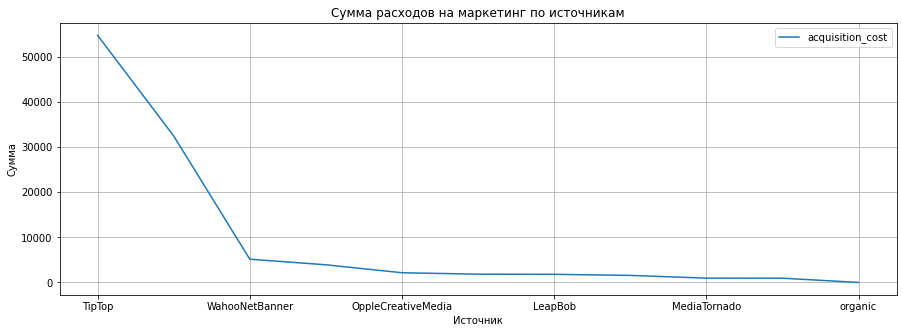

In [35]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values('acquisition_cost', ascending = False ).plot(grid=True, figsize=(15, 5))
plt.title('Сумма расходов на маркетинг по источникам')
plt.ylabel('Сумма')
plt.xlabel('Источник')
plt.show()

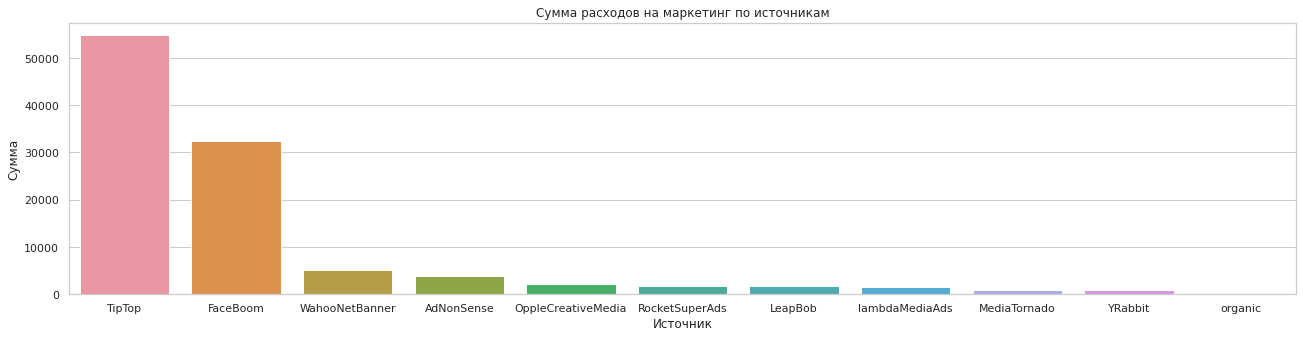

In [36]:
prf = profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values('acquisition_cost',ascending=False).reset_index()
plt.figure(figsize=(22,5))
sns.set(style='whitegrid')
sns.barplot(x='channel', y="acquisition_cost", data=prf )
plt.title('Сумма расходов на маркетинг по источникам')
plt.ylabel('Сумма')
plt.xlabel('Источник')
plt.show()

Самые большие источники трафика по сумме расходов это TipTop, FaceBoom, WahooNetBanner

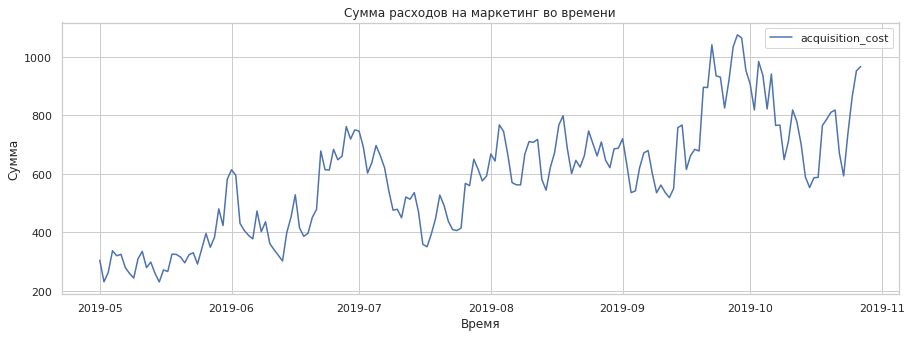

In [37]:
profiles.groupby('dt').agg({'acquisition_cost': 'sum'}).plot(grid=True, figsize=(15, 5))
plt.title('Сумма расходов на маркетинг во времени')
plt.ylabel('Сумма')
plt.xlabel('Время')
plt.show()

Cумма расходов на маркетинг со временем растёт. На графике можно увидеть пик в районе 10 месяца 2019 года

### 4.2. Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используйте профили пользователей.
Напишите промежуточные выводы.

CAC
CAC, или Customer Acquisition Cost, — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент. В сущности, CAC — это инвестиции в маркетинг.

In [38]:
observation_date = profiles['dt'].max()
analysis_horizon = 14

ROI
ROI, или Return On Investment, — окупаемость инвестиций. В экономике одного покупателя эта метрика показывает, на сколько процентов LTV превысил CAC. Ещё говорят: на сколько процентов «окупились» клиенты.

In [39]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
)

roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3627,1.008023,0.501816,0.586992,0.641588,0.677074,0.699185,0.725399,0.747236,0.760885,0.782730,0.795014,0.798017,0.806206,0.818490,0.829417
FaceBoom,26736,1.113659,0.525497,0.593113,0.628178,0.653688,0.670115,0.682183,0.695121,0.704409,0.711147,0.718724,0.723618,0.729149,0.733844,0.737531
LeapBob,7875,0.209947,0.509553,0.735933,0.971349,1.114418,1.233335,1.366140,1.493507,1.587681,1.759830,1.874520,1.986198,2.085803,2.176347,2.251801
MediaTornado,4081,0.219005,0.635417,0.882206,1.134578,1.352421,1.532302,1.694224,1.794721,1.928728,2.029247,2.124161,2.235835,2.336332,2.420079,2.454708
OppleCreativeMedia,7890,0.249905,0.391262,0.533004,0.698562,0.840299,0.982574,1.083804,1.179977,1.257421,1.335920,1.411847,1.483215,1.534338,1.607775,1.665982
RocketSuperAds,4142,0.420648,0.503574,0.771704,0.957864,1.101063,1.246558,1.373148,1.536453,1.651018,1.774795,1.896259,1.994209,2.074406,2.152308,2.238228
TipTop,17953,2.733487,0.124107,0.181281,0.227717,0.270309,0.308344,0.342514,0.371273,0.401762,0.429099,0.456211,0.480249,0.502173,0.522736,0.545250
WahooNetBanner,7832,0.601685,0.316444,0.485073,0.619988,0.729062,0.851269,0.939375,1.044277,1.121577,1.197193,1.266026,1.342479,1.402415,1.470194,1.520177
YRabbit,3990,0.216684,0.757475,0.983738,1.179974,1.401622,1.649918,1.794210,1.921186,2.036631,2.140521,2.232867,2.330985,2.434898,2.534173,2.597661


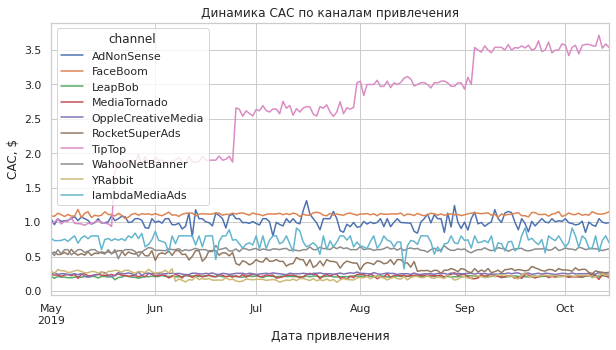

In [40]:
# строим график истории изменений CAC

roi_history.pivot_table(
    index='dt', columns='channel', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Привлечение одного пользователя из рекламной сети «Tip Top» растёт каждый месяц, а из других источников в среднем меньше или равно 1$.

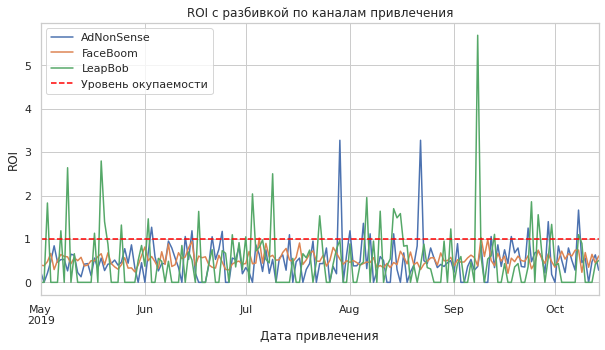

In [41]:
# строим график истории изменения ROI первого дня

r_h = roi_history.pivot_table(
    index='dt', columns='channel', values=0, aggfunc='mean'
)
r_h.iloc[:, 0:3].plot(grid=True, figsize=(10, 5))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

LeapBob и FaceBoom часто переходят черту окупаемости 

Разбил графики на "части", чтобы было хоть немного удобнее смотреть



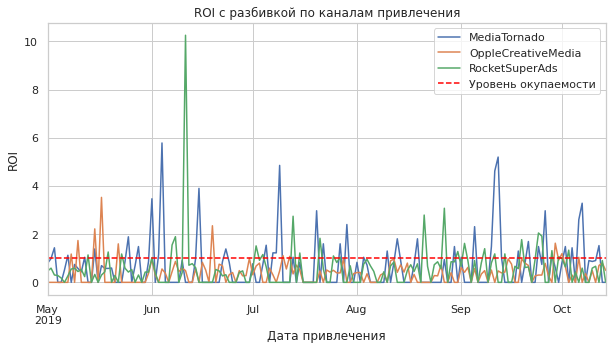

In [42]:
r_h.iloc[:, 3:6].plot(grid=True, figsize=(10, 5))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

В июне RocketSuperAds дал большой скачок в окупаемости, а в среднем по месяцам больше давал источник MediaTornado

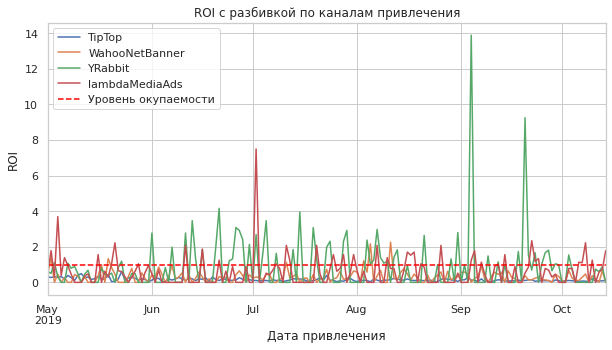

In [43]:
r_h.iloc[:, 6:10].plot(grid=True, figsize=(10, 5))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

YRabbit часто переходит уровень оккупаемости, в сентебре был самый большой уровень, также lambdaMediaAds часто переходит уровень окупаемости

### 4.1 Вывод

Промежуточные выводы: 

- Привлечение одного пользователя из рекламной сети «Tip Top» растёт каждый месяц, а из других источников в среднем меньше или равно 1$.

- LeapBob и FaceBoom часто переходят черту окупаемости


- В июне RocketSuperAds дал большой скачок в окупаемости, а в среднем по месяцам больше давал источник MediaTornado


- YRabbit часто переходит уровень оккупаемости, в сентебре был самый большой уровень, также lambdaMediaAds часто переходит уровень окупаемости

## Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые вы обнаружили. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. При решении этого шага считаем, что мы смотрите данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [44]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Задаю момент и горизонт анализа

# LTV
LTV, или Lifetime Value, — это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. В теории эта метрика включает все прошлые, нынешние и будущие покупки пользователя. На практике чаще анализируют LTV за определённый срок — первые 1, 3, 7 и 14 дней после регистрации.


# CAC
CAC, или Customer Acquisition Cost, — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент. В сущности, CAC — это инвестиции в маркетинг.


# ROI
ROI, или Return On Investment, — окупаемость инвестиций. В экономике одного покупателя эта метрика показывает, на сколько процентов LTV превысил CAC. Ещё говорят: на сколько процентов «окупились» клиенты.

### Проанализируйте общую окупаемость рекламы

In [45]:
#Исключил органический трафик
profiles = profiles.query('channel != "organic"')

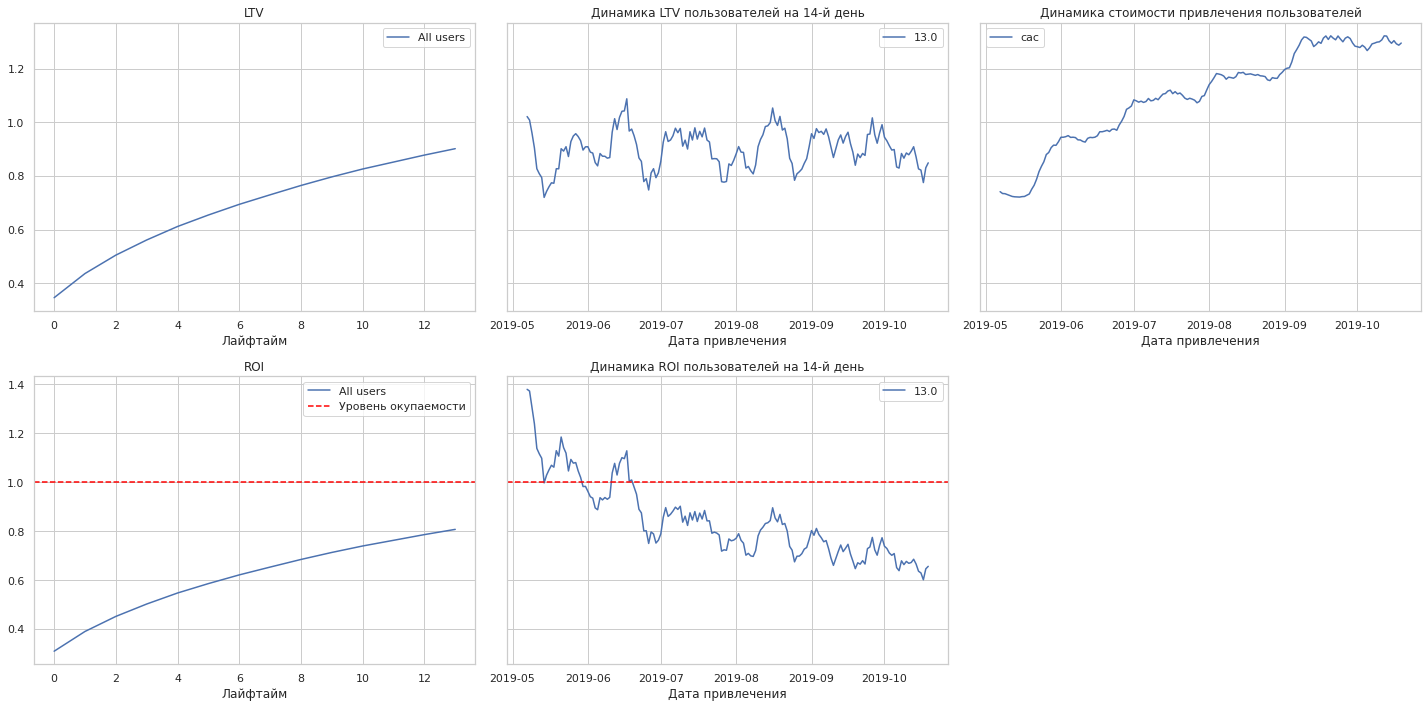

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

В некоторых графиках прослеживаются странные паттерны, которые необычны для метрик, например изменение CAC в динамике, ниже нам удастся найти причину этой аномалии, но здесь можно отметить, что такую странность тебе удалось заметить, это ведь не просто повышение, а многократные скачки, которые кстати связаны с одним крупным каналом

# По графикам можно сделать такие выводы:

LTV растёт, но не больше единицы.

CAC не стабилен. Значит, дело в увеличении рекламного бюджета, деньги вкладывают, но не окупают.


Реклама не окупается. ROI в конце двух недель не пересекает черту окупаемости.



Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству.

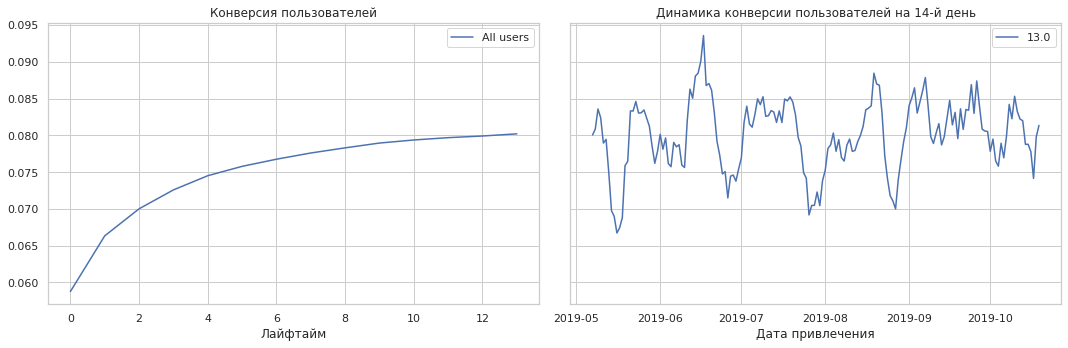

In [47]:
# смотрим конверсию без разбивки
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия хорошая

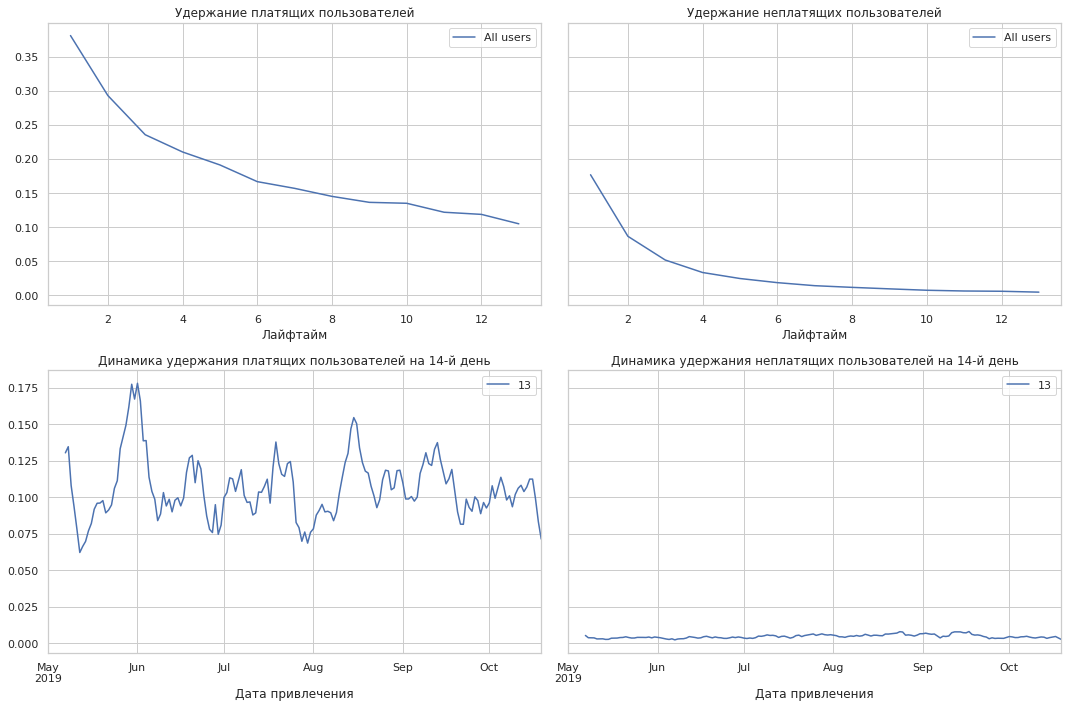

In [48]:
# смотрим удержание без разбивки

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи  стабильно плохо удерживаются.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

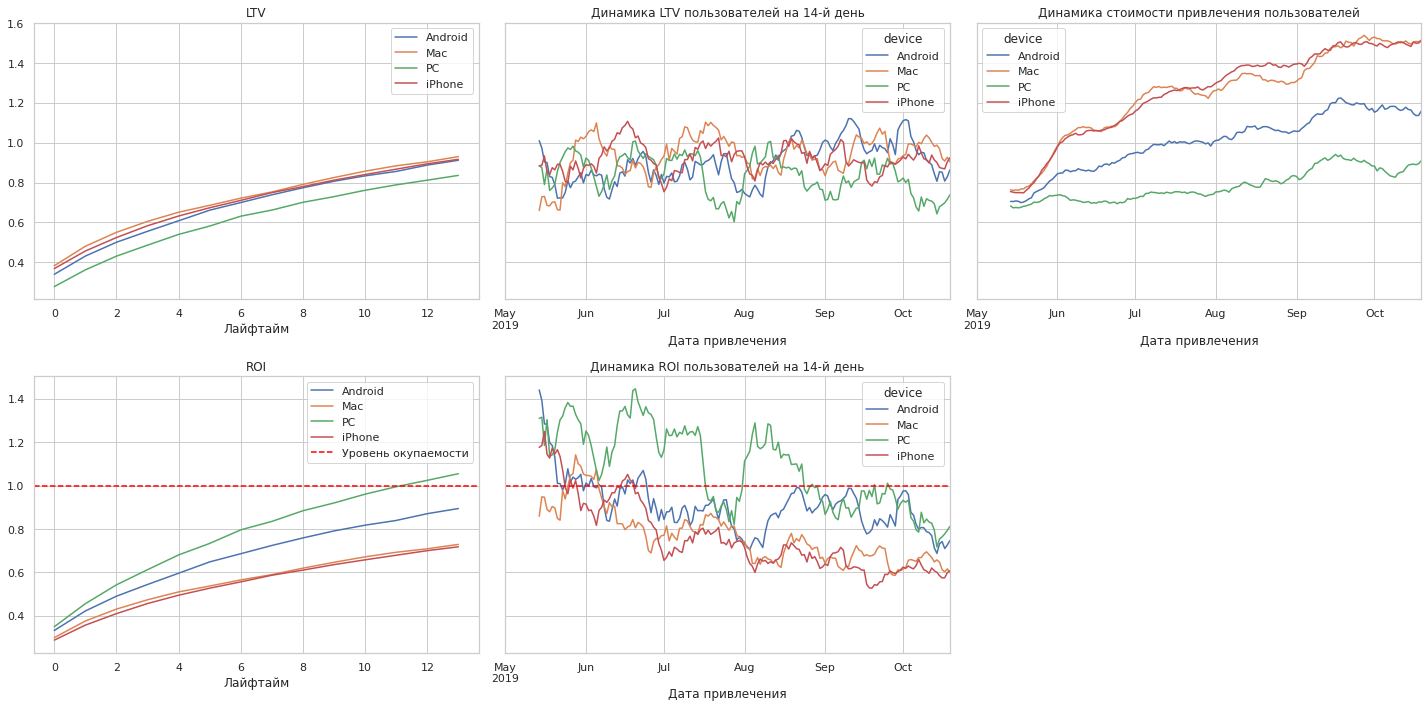

In [49]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графику ROI пользователи iPhone, Android и Мac не окупаются.


А на 14 день и вовсе, ничто не окупается.

Хочу акцентировать ваше внимание на способе решения в данном случае комплексной задачи - неокупаемость маркетинга. Мы эту составную проблему раскладываем на частные причины, декомпозируем весь трафик по странам, устройствам, регионам и ищем где конкретно и в какой момент случилась проблема.

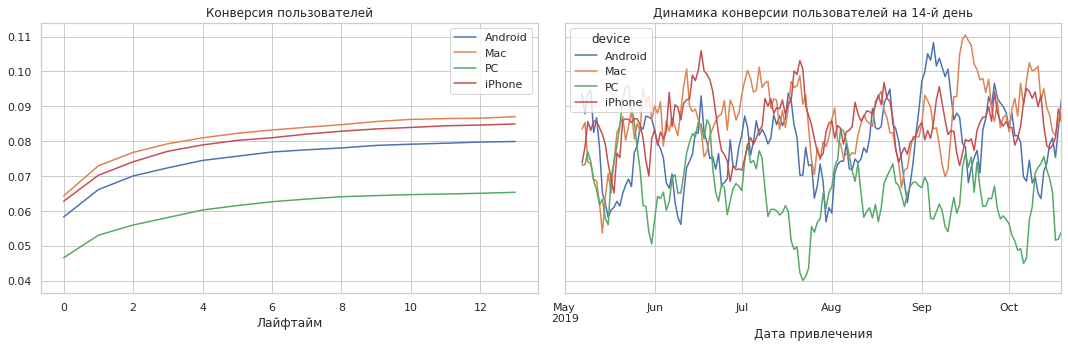

In [50]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия в порядке. 

Самая низкая конверсия у пользователей PC

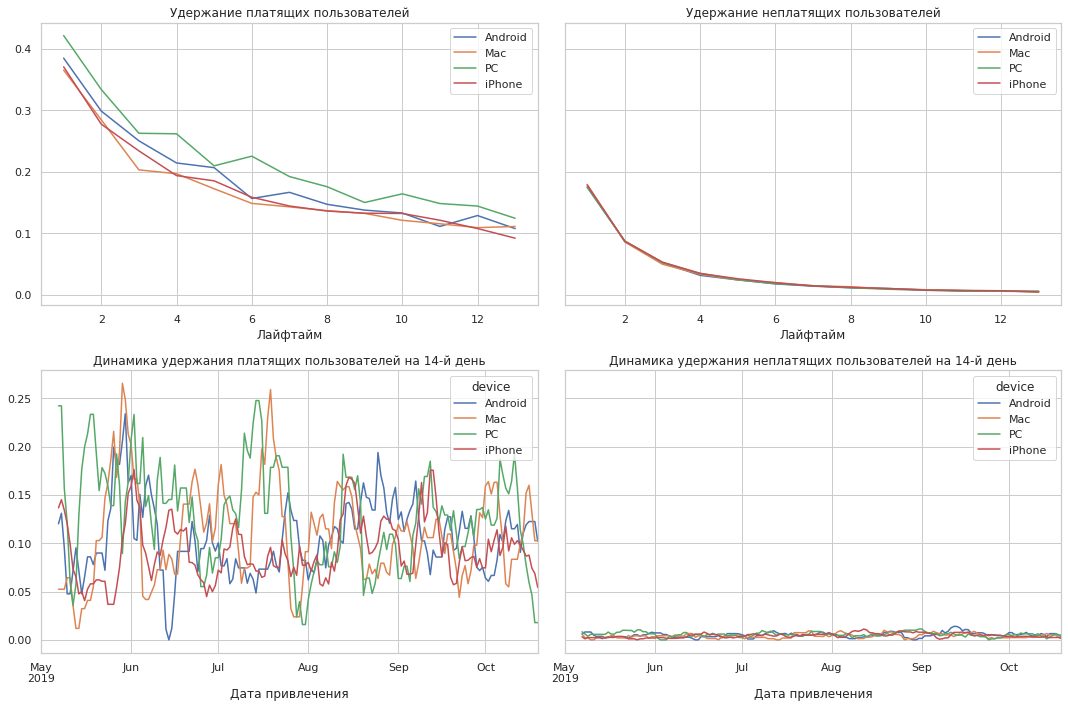

In [51]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вижу отрицательный рост

Удержание стабильно для всех устройств. 

Не вижу никаких выбивающихся значений. 

Обратим внимание, что удержание неплатящих пользователей из разных каналов, стран, платформ ровное, а удержание платящих очень отличается

### Проанализируйте окупаемость рекламы с разбивкой по странам

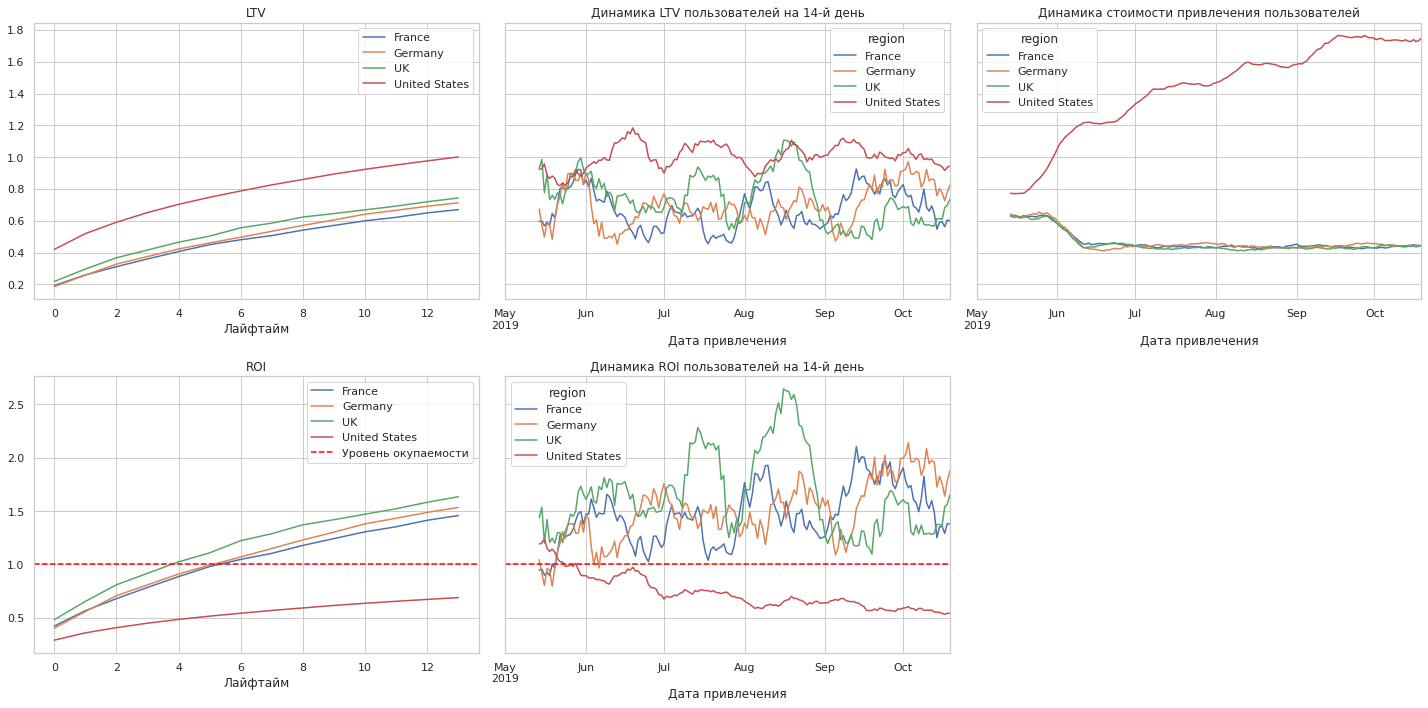

In [52]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

# Вот что говорят графики:

LTV выше единицы только у United States.


В  самые дорогие пользователи. Цена очень сильно скачет вверх при том, что её ROI не окупается, об этом точно стоит сообщить
Реклама в United States не окупается везде.




Лучше всего окупается UK.


Значит, дело в стране United States — эту версию можно включить в сообщение компании.

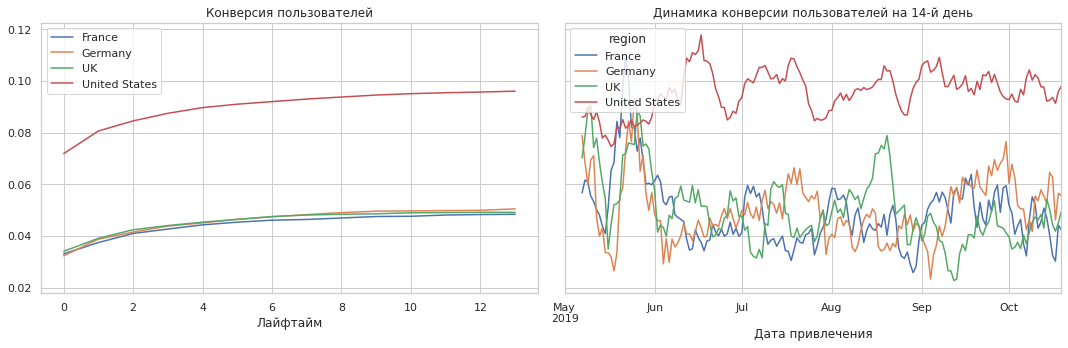

In [53]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая большая конверсия у United States

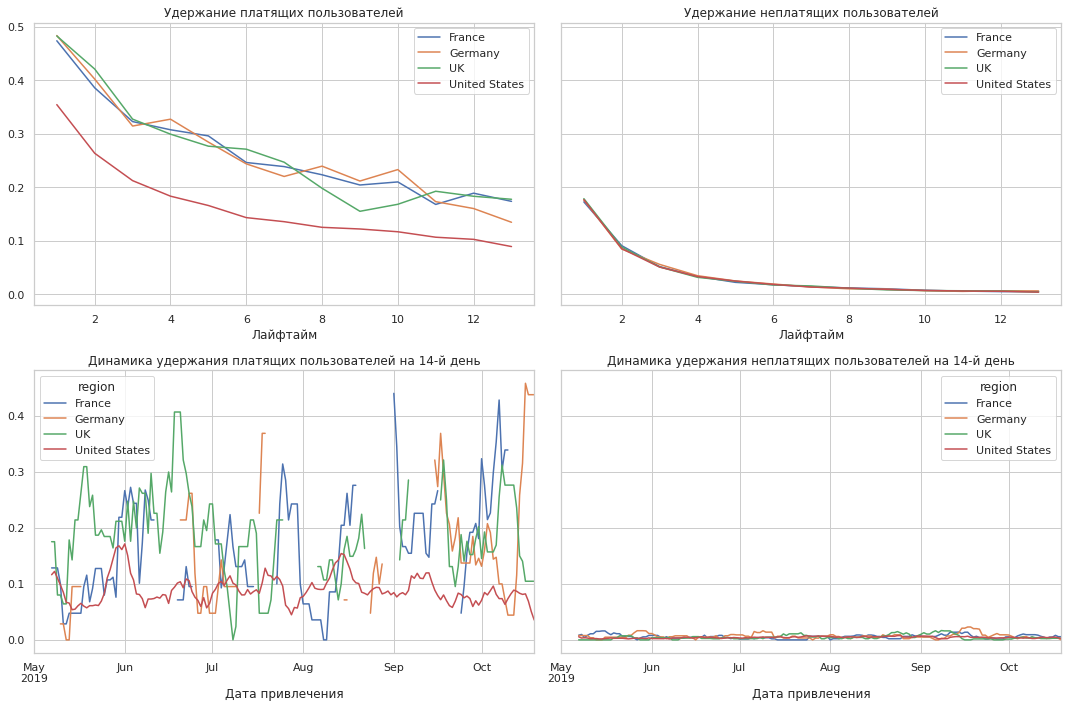

In [54]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Так же стоит сообщить про United States. На графике удержания платящих пользователей показатели у United States в самом низу.

Существенная проблема - плохое удержание в US

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

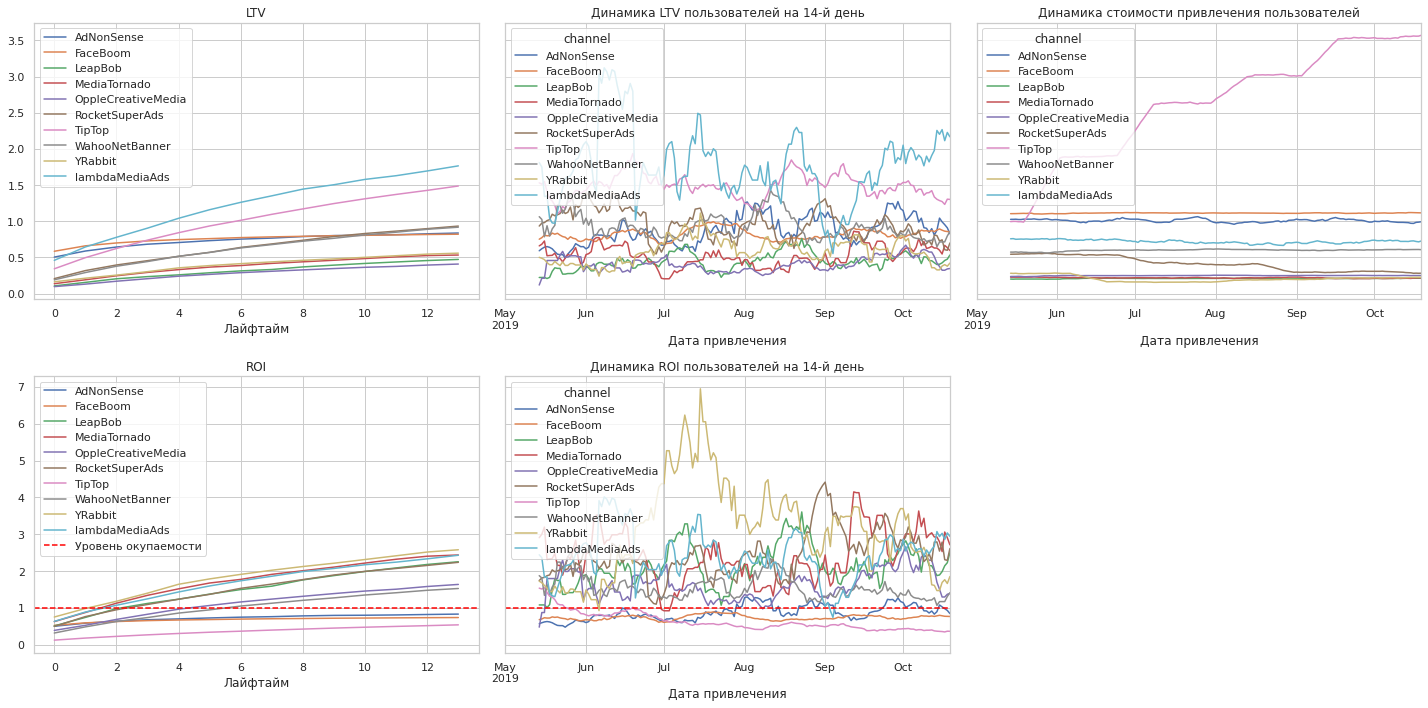

In [55]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Очень много каналов привлечения.

- LTV - Выше единицы только Tip Top и приближается канал lambdaMediaAds.


- Динамика стоимости привлечения Tip Top очень сильно растёт вверх, при этом канал привлечения не окупается. Об этом стоит сообщить. 


- ROI - Ниже единицы это Tip Top, FaceBoom, LeapBob. Они не окупаются.


- ROI на 14 день не окупается у AdNonSense, Tip Top, FaceBoom.


Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().

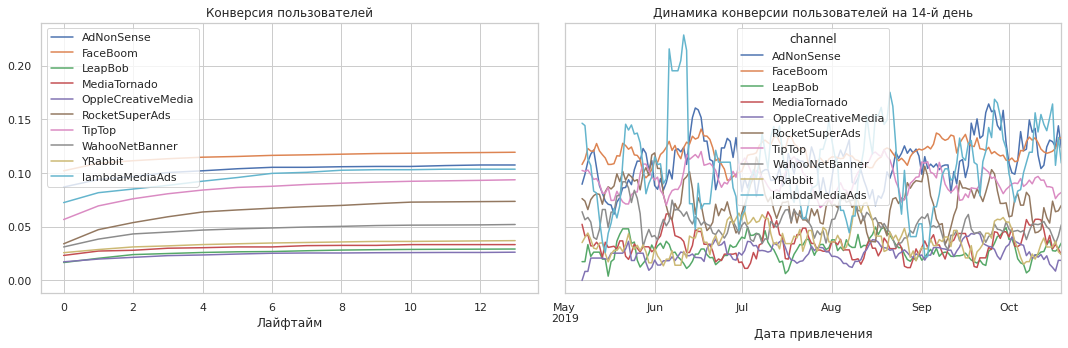

In [56]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

У некоторых каналов привлечения значения конверсии близки к нулю. 

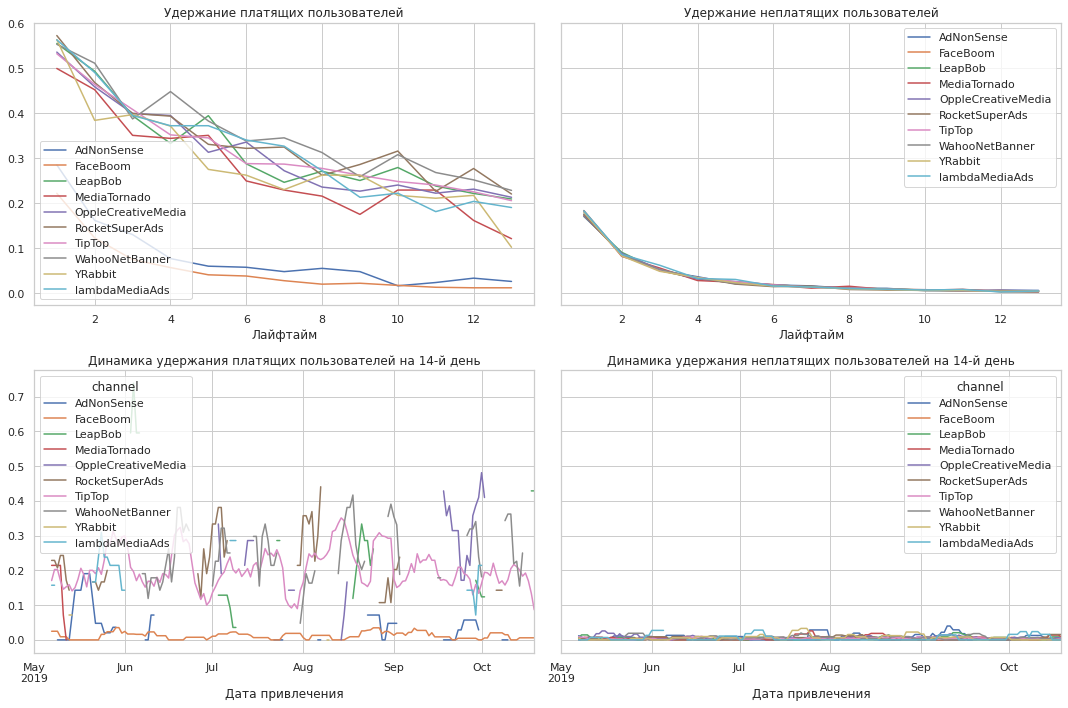

In [57]:
# смотрим удержание с разбивкой по каналу

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

#разрывы в данных это не ошибка, а такие предоставили данные. (со слов куратора) 
или если я правильно понял, в эти периоды (где прерываются линии)- просто нет платящих пользователей, пришедших из этих каналов



Удержание платящих пользователей у каналов AdNonSense и FaceBoom стабильно плохо удерживаются. 
Надо об этом сообщить.

Скорее условно пришёл один пользователь платящий через LeapBob 15 июля, и больше в приложение не заходил, поэтому и 15 июля нет значения у LepBob

## Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

# Причины неэффективности привлечения пользователей 
#### Общая окупаемость рекламы: 
- CAC не стабилен. Значит, дело в увеличении рекламного бюджета, деньги вкладывают, но не окупают.


- ROI не окупается. 


- ROI в конце двух недель не пересекает черту окупаемости.


####  окупаемость рекламы с разбивкой по устройствам:


- По графику ROI пользователи iPhone, Android и Мac не окупаются.
- А на 14 день и вовсе, ничто не окупается.
- Удержание стабильно плохое для всех устройств.


####   с разбивкой по странам:

- Самые дорогие пользователи в United States. Цена очень сильно скачет вверх при том, что её ROI не окупается, об этом точно стоит сообщить

- Реклама в United States не окупается.

- На графике удержания платящих пользователей показатели у United States в самом низу.

####  с разбивкой по рекламным каналам:

- Динамика стоимости привлечения Tip Top очень сильно растёт вверх, при этом канал привлечения не окупается. Об этом стоит сообщить.


- ROI - Ниже единицы это Tip Top, FaceBoom, LeapBob. Они не окупаются.


- ROI на 14 день не окупается у AdNonSense, Tip Top, FaceBoom.


- Удержание платящих пользователей у каналов AdNonSense и FaceBoom стабильно плохо удерживаются. Надо об этом сообщить

# Рекомендации

- Проверить, какие технические или иные ошибки могут быть с пользователями использующие Android, iPhone и Мac.


- Узнать почему реклама в стране United States не окупается. Узнать причины, почему в этой стране реклама не окупается и пользователи плохо удерживаются. И почему там самая большая стоимость привлечения одного клиента.


- Проверить какие ошибки могут быть в работе таких каналов привлечения как - Tip Top, FaceBoom, LeapBob

Не знаю насколько эффективно в маркетиге использовать много каналов привлечения, если их конверсия близка к нулю. Могу только предположить свою мысль, чтобы не трать сил на много каналов, можно сконцентрироваться на нескольких "проверенных" и пустить свои силы туда. 


У некоторых каналов привлечения значения конверсии близки к нулю.